In [1]:
# Install if not already installed
!pip install pandas matplotlib seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default style
sns.set(style="whitegrid")



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
print(os.getcwd())


C:\Users\lenovo\Downloads\sales_analysis_project\notebooks


In [8]:
file_path = '../data/sales_data_v2.csv'


columns = ['Order ID', 'Customer ID', 'Date', 'Product', 'Category', 'Quantity', 'Price', 'Total Sales']

df = pd.read_csv(file_path, names=columns, header=None)

df.head()


,Order ID,Customer ID,Date,Product,Category,Quantity,Price,Total Sales
0,1,C001,2024-03-21,Wireless Mouse,Electronics,2,500.0,1000.0
1,2,C002,2024-03-22,Office Chair,Furniture,1,3500.0,3500.0
2,3,C003,2024-03-23,Laptop Stand,Electronics,1,1500.0,1500.0
3,4,C004,2024-03-24,Notebook,Stationery,5,50.0,250.0
4,5,C002,2024-03-25,LED Monitor,Electronics,1,7000.0,7000.0


In [9]:
# Step 1: Data Preparation ✅

# Basic Info
print("Dataset Info:\n")
df.info()

print("\nMissing Values:\n")
print(df.isnull().sum())

print("\nBasic Statistics:\n")
print(df.describe())

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract additional date parts
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['MonthName'] = df['Date'].dt.strftime('%B')
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.day_name()

# Add Week & Quarter for more analysis
df['Week'] = df['Date'].dt.isocalendar().week
df['Quarter'] = df['Date'].dt.quarter

# Quick check
print("\nPreview after date feature engineering:\n")
df.head()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order ID     11 non-null     int64  
 1   Customer ID  11 non-null     object 
 2   Date         11 non-null     object 
 3   Product      11 non-null     object 
 4   Category     11 non-null     object 
 5   Quantity     11 non-null     int64  
 6   Price        11 non-null     float64
 7   Total Sales  11 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 836.0+ bytes

Missing Values:

Order ID       0
Customer ID    0
Date           0
Product        0
Category       0
Quantity       0
Price          0
Total Sales    0
dtype: int64

Basic Statistics:

        Order ID   Quantity        Price  Total Sales
count  11.000000  11.000000    11.000000    11.000000
mean    6.000000   2.636364  1933.636364  2286.363636
std     3.316625   2.730301  2280.229255  2145.

,Order ID,Customer ID,Date,Product,Category,Quantity,Price,Total Sales,Year,Month,MonthName,Day,DayOfWeek,Week,Quarter
0,1,C001,2024-03-21,Wireless Mouse,Electronics,2,500.0,1000.0,2024,3,March,21,Thursday,12,1
1,2,C002,2024-03-22,Office Chair,Furniture,1,3500.0,3500.0,2024,3,March,22,Friday,12,1
2,3,C003,2024-03-23,Laptop Stand,Electronics,1,1500.0,1500.0,2024,3,March,23,Saturday,12,1
3,4,C004,2024-03-24,Notebook,Stationery,5,50.0,250.0,2024,3,March,24,Sunday,12,1
4,5,C002,2024-03-25,LED Monitor,Electronics,1,7000.0,7000.0,2024,3,March,25,Monday,13,1


In [10]:
df['Category'] = df['Category'].astype('category')
df['Product'] = df['Product'].astype('category')
df['DayOfWeek'] = df['DayOfWeek'].astype('category')


In [11]:
df = df.sort_values('Date')


In [12]:
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday'])


<Figure size 1200x600 with 0 Axes>

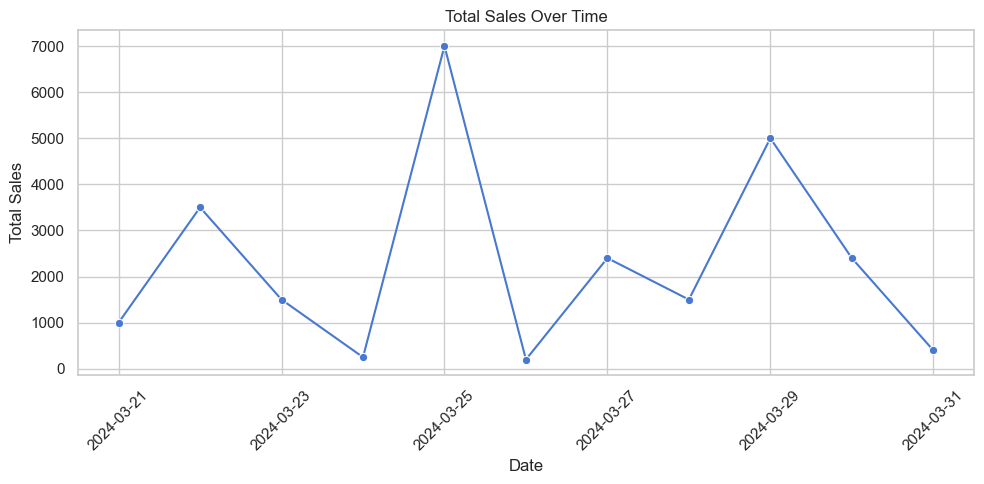

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20912\337027166.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Category', y='Total Sales', estimator=sum, ci=None)


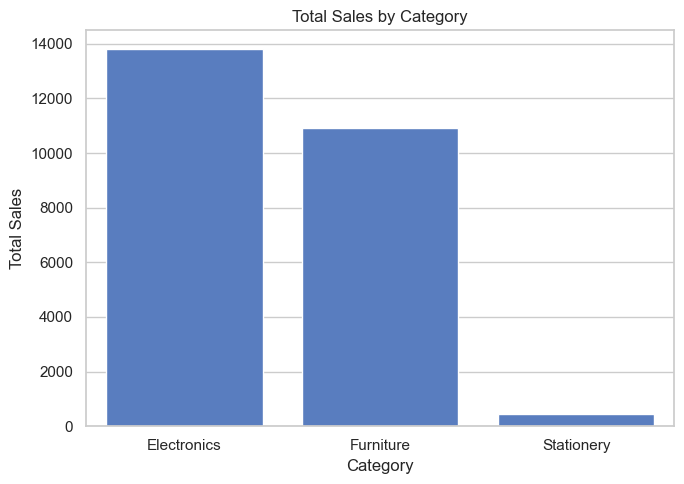

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20912\337027166.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Product', y='Total Sales', estimator=sum, ci=None)


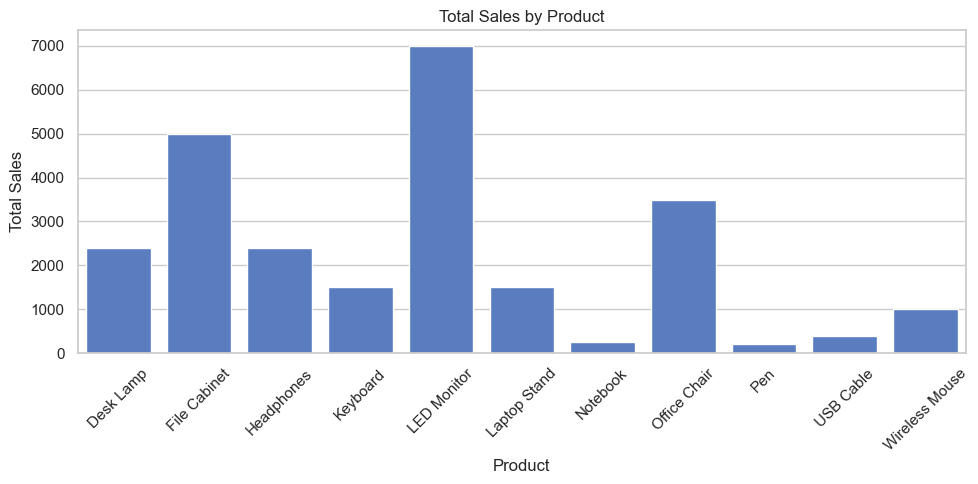

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20912\337027166.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Category', y='Quantity', estimator=sum, ci=None)


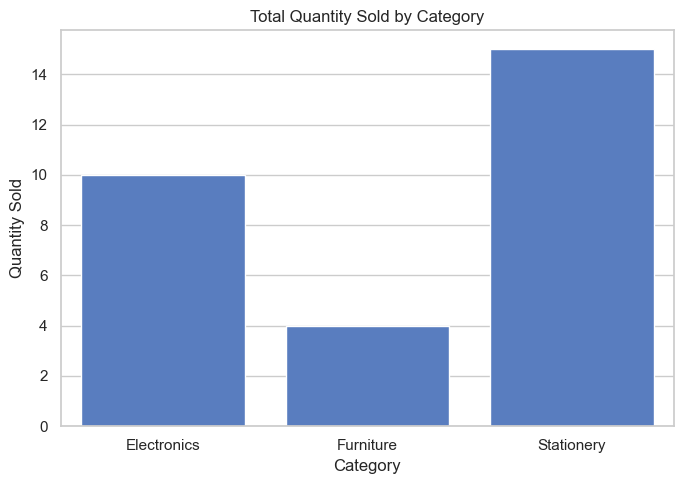

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20912\337027166.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='DayOfWeek', y='Total Sales', estimator=sum, ci=None, order=order)


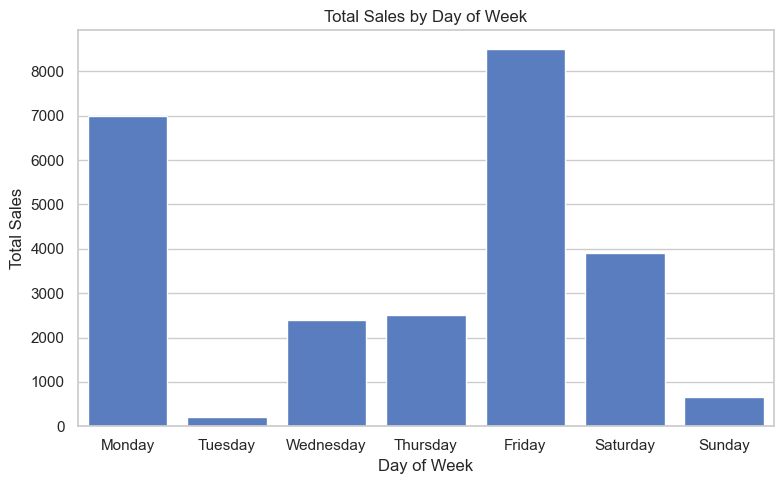

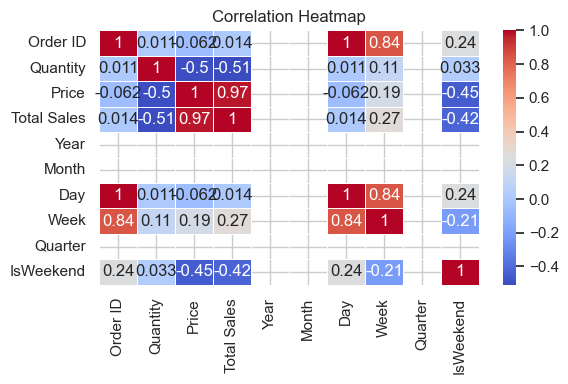

EDA Completed ✅


In [13]:
# Step 2: Exploratory Data Analysis (EDA) ✅

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(12, 6))

# 1. Sales Trend Over Time 📈
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Date', y='Total Sales', marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Sales by Category 🛒
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x='Category', y='Total Sales', estimator=sum, ci=None)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# 3. Sales by Product 📦
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Product', y='Total Sales', estimator=sum, ci=None)
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Quantity Sold by Category 🔢
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x='Category', y='Quantity', estimator=sum, ci=None)
plt.title('Total Quantity Sold by Category')
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()

# 5. Sales by Day of Week 📅
plt.figure(figsize=(8, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=df, x='DayOfWeek', y='Total Sales', estimator=sum, ci=None, order=order)
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# 6. Correlation Heatmap 🔥
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

print("EDA Completed ✅")


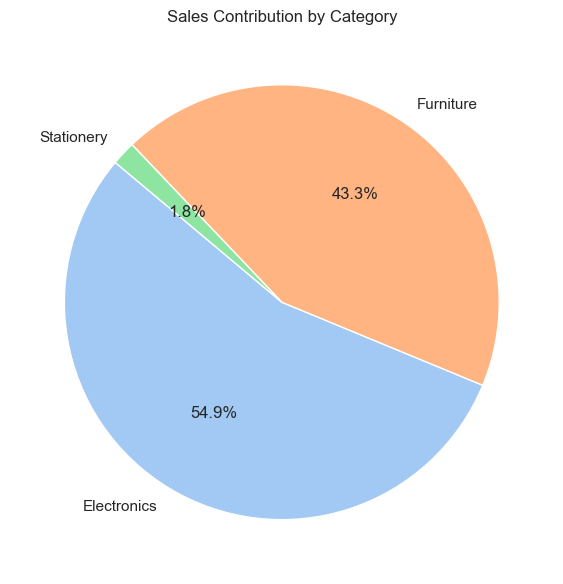

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20912\2337994707.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


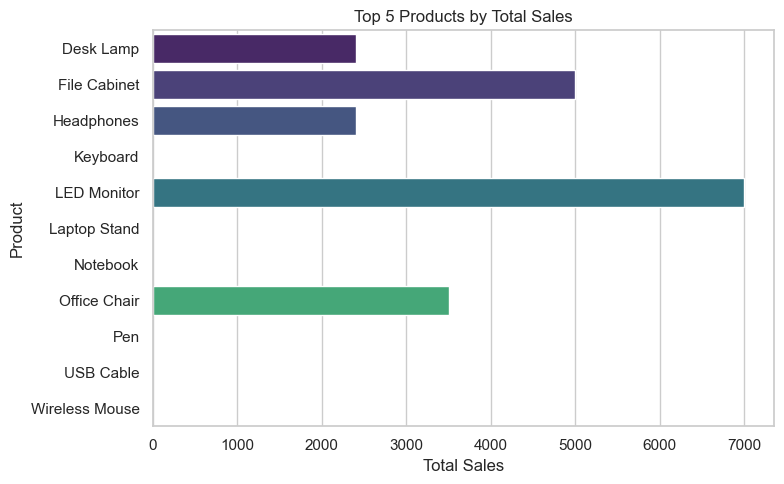

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20912\2337994707.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_sales.values, y=customer_sales.index, palette='cool')


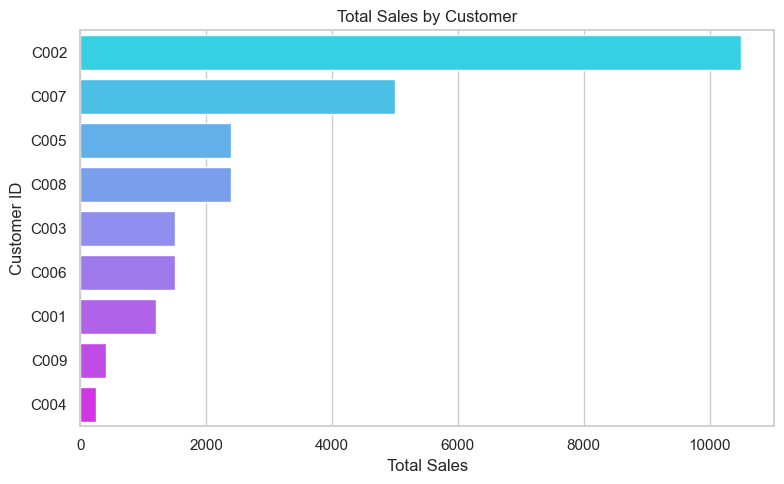

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20912\2337994707.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quantity_product.values, y=quantity_product.index, palette='magma')


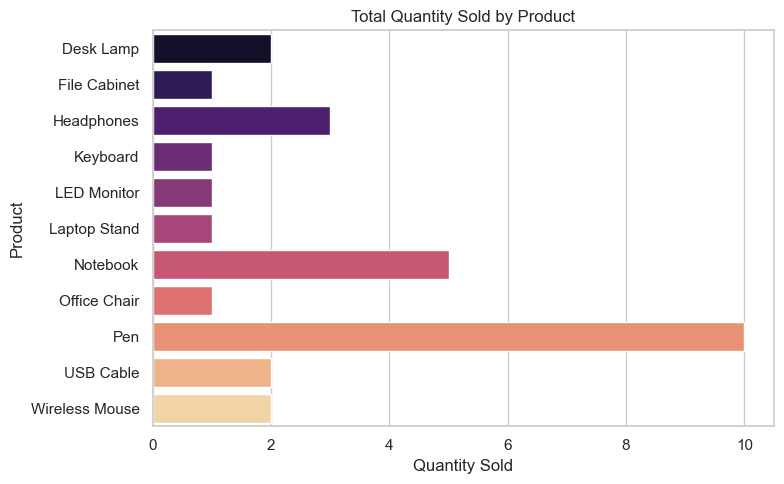

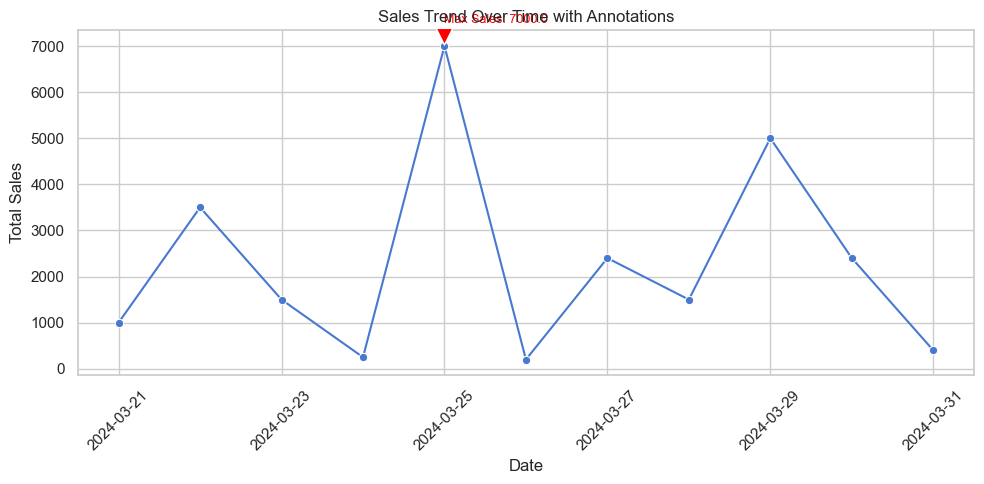

Bonus EDA Completed ✅


In [14]:
# Additional EDA Visualizations ✅

# 7. Pie Chart: Sales Contribution by Category 🥧
plt.figure(figsize=(6, 6))
category_sales = df.groupby('Category')['Total Sales'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sales Contribution by Category')
plt.ylabel('')
plt.tight_layout()
plt.show()

# 8. Top 5 Products by Sales 🏆
plt.figure(figsize=(8, 5))
top_products = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(5)
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 5 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

# 9. Customer-Wise Sales Analysis 🧑‍💼
plt.figure(figsize=(8, 5))
customer_sales = df.groupby('Customer ID')['Total Sales'].sum().sort_values(ascending=False)
sns.barplot(x=customer_sales.values, y=customer_sales.index, palette='cool')
plt.title('Total Sales by Customer')
plt.xlabel('Total Sales')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()

# 10. Quantity Sold by Product 🔢
plt.figure(figsize=(8, 5))
quantity_product = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
sns.barplot(x=quantity_product.values, y=quantity_product.index, palette='magma')
plt.title('Total Quantity Sold by Product')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

# 11. Sales Trend with Annotations 🖊️
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Date', y='Total Sales', marker='o')
plt.title('Sales Trend Over Time with Annotations')
plt.xlabel('Date')
plt.ylabel('Total Sales')

# Annotate max sales point
max_sales_date = df[df['Total Sales'] == df['Total Sales'].max()]['Date'].values[0]
max_sales_value = df['Total Sales'].max()
plt.annotate(f'Max Sales: {max_sales_value}',
             xy=(max_sales_date, max_sales_value),
             xytext=(max_sales_date, max_sales_value + 500),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=9,
             color='red')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Bonus EDA Completed ✅")


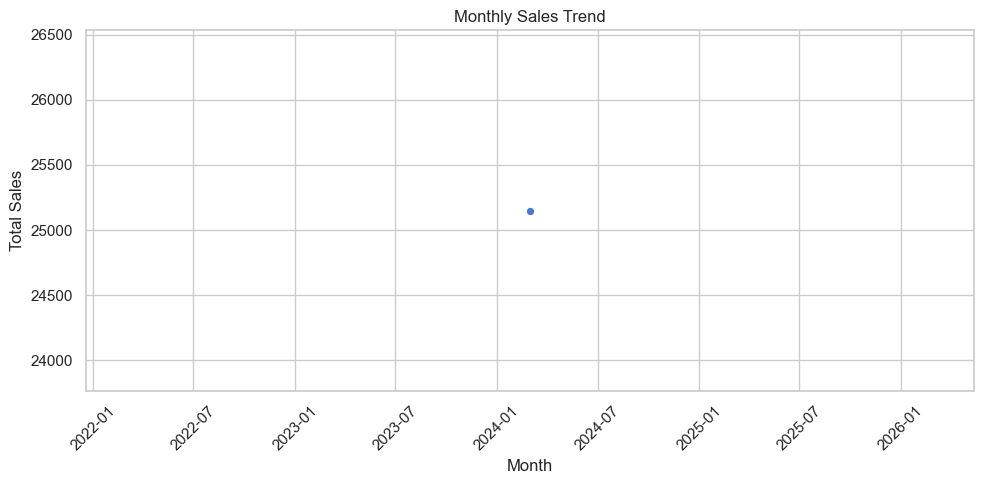

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20912\3160814139.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quarterly_sales, x='Quarter_Label', y='Total Sales', palette='Blues_d')


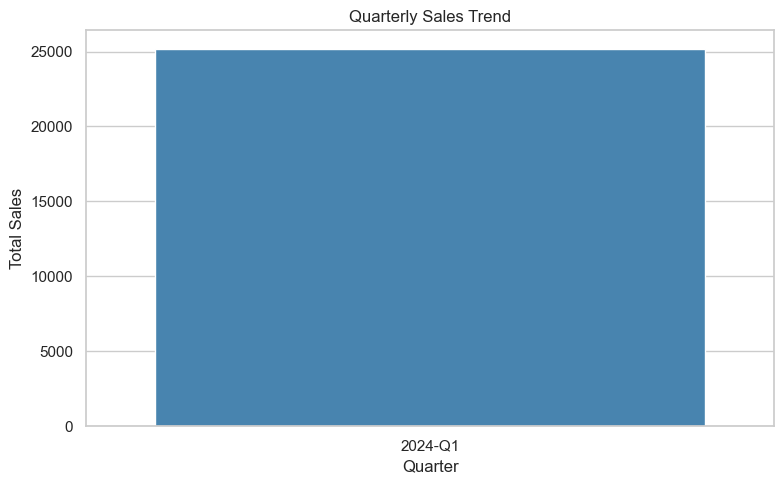

In [15]:
# Monthly Sales Trend 📅
plt.figure(figsize=(10, 5))
monthly_sales = df.groupby(['Year', 'Month'])['Total Sales'].sum().reset_index()
monthly_sales['Month_Year'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))
sns.lineplot(data=monthly_sales, x='Month_Year', y='Total Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_sales_trend.png')
plt.show()

# Quarterly Sales Trend 📊
plt.figure(figsize=(8, 5))
quarterly_sales = df.groupby(['Year', 'Quarter'])['Total Sales'].sum().reset_index()
quarterly_sales['Quarter_Label'] = quarterly_sales['Year'].astype(str) + '-Q' + quarterly_sales['Quarter'].astype(str)
sns.barplot(data=quarterly_sales, x='Quarter_Label', y='Total Sales', palette='Blues_d')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig('quarterly_sales_trend.png')
plt.show()


In [16]:
# Pivot Table: Sales by Category and Month 📊
pivot = pd.pivot_table(df, index='Category', columns='MonthName', values='Total Sales', aggfunc='sum', fill_value=0)
print("\nPivot Table - Sales by Category and Month:\n")
print(pivot)



Pivot Table - Sales by Category and Month:

MonthName    March
Category          
Electronics  13800
Furniture    10900
Stationery     450


In [19]:
# Quarterly Sales Trend 📊
plt.figure(figsize=(8, 5))
sns.barplot(data=quarterly_sales, x='Quarter_Label', y='Total Sales', hue='Quarter_Label', palette='Blues_d', legend=False)
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig('plots/quarterly_sales_trend.png')
plt.close()

# Sales by Category 📦
plt.figure(figsize=(8, 5))
sns.barplot(data=category_sales, x='Category', y='Total Sales', hue='Category', palette='viridis', legend=False)
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig('plots/sales_by_category.png')
plt.close()

# Sales by Product 📦
plt.figure(figsize=(10, 6))
sns.barplot(data=product_sales, x='Total Sales', y='Product', hue='Product', palette='rocket', legend=False)
plt.title('Sales by Product')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.tight_layout()
plt.savefig('plots/sales_by_product.png')
plt.close()

# Sales by Day of Week 📅
plt.figure(figsize=(8, 5))
sns.barplot(data=dow_sales, x='DayOfWeek', y='Total Sales', hue='DayOfWeek', palette='coolwarm', legend=False)
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plots/sales_by_day_of_week.png')
plt.close()



In [20]:
# Generate insights text
insights = []

# Quarterly Sales Trend
top_quarter = quarterly_sales.loc[quarterly_sales['Total Sales'].idxmax()]
insights.append(f"The best performing quarter is **{top_quarter['Quarter_Label']}** with total sales of **₹{top_quarter['Total Sales']:,.2f}**.")

# Sales by Category
top_category = category_sales.loc[category_sales['Total Sales'].idxmax()]
insights.append(f"The top selling category is **{top_category['Category']}** with sales of **₹{top_category['Total Sales']:,.2f}**.")

# Sales by Product
top_product = product_sales.iloc[0]  # Sorted already
insights.append(f"The best-selling product is **{top_product['Product']}** with sales of **₹{top_product['Total Sales']:,.2f}**.")

# Sales by Day of Week
top_day = dow_sales.loc[dow_sales['Total Sales'].idxmax()]
insights.append(f"The busiest sales day is **{top_day['DayOfWeek']}**, generating **₹{top_day['Total Sales']:,.2f}** in sales.")

# Save insights to text file
with open('plots/sales_insights.txt', 'w', encoding='utf-8') as f:
    for line in insights:
        f.write(line + '\n')

print("Insights generated and saved to 'plots/sales_insights.txt'")


Insights generated and saved to 'plots/sales_insights.txt'


In [21]:
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
from reportlab.lib.utils import ImageReader

# Create PDF
c = canvas.Canvas("plots/Sales_Report.pdf", pagesize=A4)
width, height = A4

# Title
c.setFont("Helvetica-Bold", 20)
c.drawString(50, height - 50, "Sales Analysis Report")

# Add insights
c.setFont("Helvetica", 12)
text = c.beginText(50, height - 100)
text.setLeading(20)
text.textLines("Insights:")

with open('plots/sales_insights.txt', 'r', encoding='utf-8') as f:
    insights = f.readlines()

for line in insights:
    text.textLine(line.strip())

c.drawText(text)

# Add images
charts = [
    "plots/quarterly_sales_trend.png",
    "plots/sales_by_category.png",
    "plots/sales_by_product.png",
    "plots/sales_by_day_of_week.png"
]

y = height - 300
for chart in charts:
    c.drawImage(ImageReader(chart), 50, y, width=500, preserveAspectRatio=True, mask='auto')
    y -= 250
    if y < 100:
        c.showPage()  # Add new page
        y = height - 100

c.save()

print("PDF report generated: 'plots/Sales_Report.pdf'")


PDF report generated: 'plots/Sales_Report.pdf'
